In [3]:
# IMPLEMENTACION DE Synthetic Minority Oversampling Technique (SMOTE)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from imblearn.over_sampling import  RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn .metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
%matplotlib inline
datos_url= "C://Users/maxib/Source/repos/proyecto_final_coder/datos/Base_predictive_maintenance.csv"

In [4]:
# Leer .csv y creo un DF
df = pd.read_csv(datos_url, delimiter=",", index_col= ["UDI", "Product_ID"])
df.head()

,,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Target,Failure_Type
UDI,Product_ID,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# Over-sampling variables target

## Variable Target

In [6]:
# Preparamos variable Target para entrenar los algoritmos
X= df.drop(["Target","Type","Failure_Type"], axis=1) 
y= df["Target"]
# instantiating the random over sampler 
ros = RandomOverSampler(sampling_strategy=0.5)
# resampling X, y
X_ros_Target, y_ros_Target = ros.fit_resample(X, y)
# new class distribution 
y_ros_Target.value_counts()
X_ros_Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14491 entries, 0 to 14490
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air_temperature_[K]      14491 non-null  float64
 1   Process_temperature_[K]  14491 non-null  float64
 2   Rotational_speed_[rpm]   14491 non-null  int64  
 3   Torque_[Nm]              14491 non-null  float64
 4   Tool_wear_[min]          14491 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 566.2 KB


## Variable Failure_Type

In [7]:
# Preparamos variable Target para entrenar los algoritmos.
X= df.drop(["Type","Failure_Type"], axis=1) 
y= df["Failure_Type"]
# instantiating the random over sampler 
ros = RandomOverSampler(sampling_strategy={"Heat Dissipation Failure":1000,"Random Failures":1000,"Tool Wear Failure":1000,
                                            "Overstrain Failure":1000, "Power Failure":1000})
# resampling X, y
X_ros_failure, y_ros_failure = ros.fit_resample(X, y)
y_ros_failure.value_counts()
X_ros_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14652 entries, 0 to 14651
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air_temperature_[K]      14652 non-null  float64
 1   Process_temperature_[K]  14652 non-null  float64
 2   Rotational_speed_[rpm]   14652 non-null  int64  
 3   Torque_[Nm]              14652 non-null  float64
 4   Tool_wear_[min]          14652 non-null  int64  
 5   Target                   14652 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 686.9 KB


# TREE CLASSIFIER

                        ###############################################
                        ## Implementacion de Decision Tree Clasifier ##
                        ###############################################
                        

## Variable Target


                        #####################
                        ## Variable Target ##
                        #####################

% de aciertos sobre el set de entrenamiento:  0.9634945828445242
% de aciertos sobre el set de evaluación:  0.9693


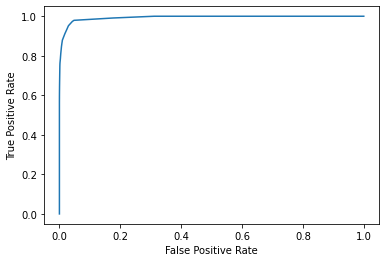

TRAIN Auc para nuestro modelo es 0.960301766102768
[[9370  291]
 [ 238 4592]]


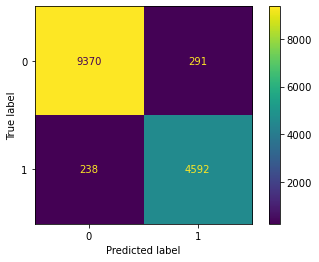

Recall Score del classificador Train: 0.9507246376811594
F1 Score del classificador Train: 0.9455369092968187
TEST Auc para nuestro modelo es 0.9613406272031911


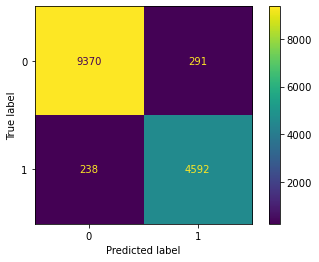

Recall Score del classificador Train: 0.9528023598820059
F1 Score del classificador Train: 0.6778593913955929


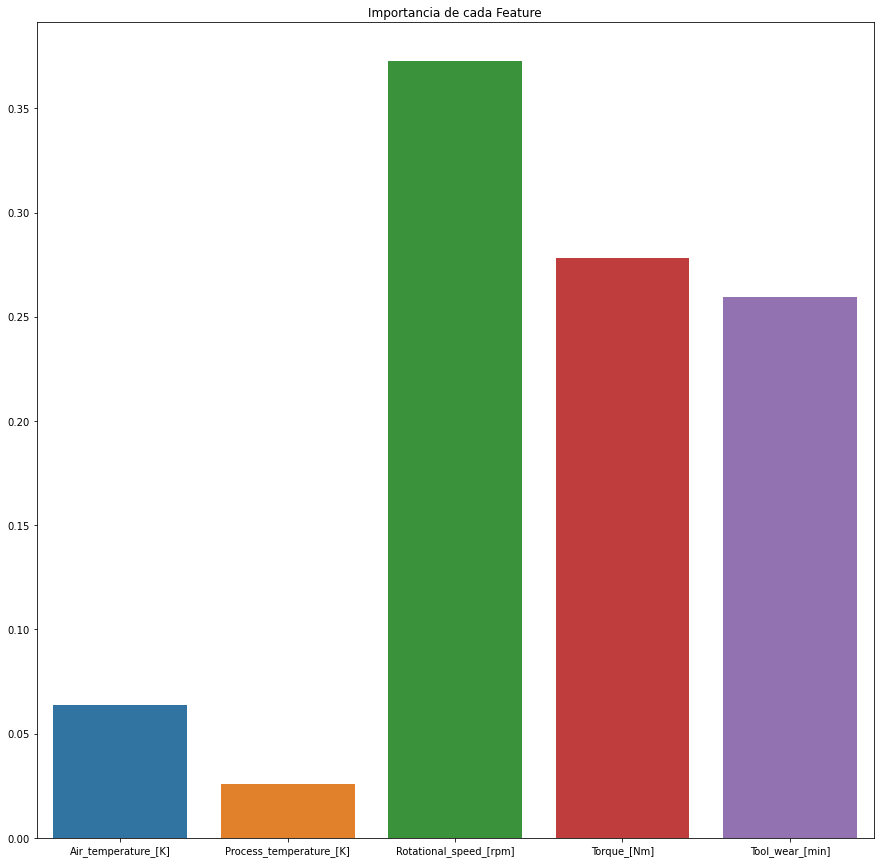

In [8]:
                        
X_target_test= df.drop(["Target","Type","Failure_Type"], axis=1) 
y_target_test= df["Target"]
# Creamos el modelo
tree= DecisionTreeClassifier(max_depth=8, random_state=42)
# Entrenamos el algoritmo
tree.fit(X_ros_Target, y_ros_Target)
# Prediccion en Train
y_train_pred= tree.predict(X_ros_Target)
# Prediccion en Test
y_test_pred= tree.predict(X_target_test)
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_ros_Target, y_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_target_test, y_test_pred)
print("% de aciertos sobre el set de entrenamiento: ", train_accuracy)
print("% de aciertos sobre el set de evaluación: ",test_accuracy)

# Graficamos ROC
y_pred_proba= tree.predict_proba(X_target_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_target_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Calculamos Datos Train
# TRAIN AUC
auc= roc_auc_score(y_ros_Target, y_train_pred)
print("TRAIN Auc para nuestro modelo es {}". format(auc))
# Matriz de Confusión train
print(confusion_matrix(y_ros_Target, y_train_pred))
# Ploteamos la Matriz train
plot_confusion_matrix(tree, X_ros_Target, y_ros_Target)
plt.show()

# Recall Train
print(f"Recall Score del classificador Train: {recall_score(y_ros_Target, y_train_pred)}")
# F1 Score Train
print(f"F1 Score del classificador Train: {f1_score(y_ros_Target, y_train_pred)}")

# Calculamos Datos Test
# TEST AUC
auc_2= roc_auc_score(y_target_test, y_test_pred)
print("TEST Auc para nuestro modelo es {}". format(auc_2))
# Ploteamos la matrix Train
plot_confusion_matrix(tree, X_ros_Target, y_ros_Target)
plt.show()
# Recall Train
print(f"Recall Score del classificador Train: {recall_score(y_target_test, y_test_pred)}")
# F1 Score Train
print(f"F1 Score del classificador Train: {f1_score(y_target_test, y_test_pred)}")

# Peso de las variables
plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X_target_test.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

## Variable Failure_Type

                                            ###########################
                                            ## Variable Failure_Type ##
                                            ###########################

% de aciertos sobre el set de entrenamiento: 0.996041496041496
% de aciertos sobre el set de evaluación: 0.9982


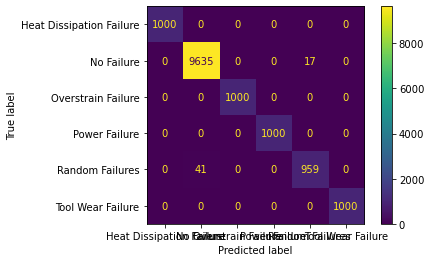

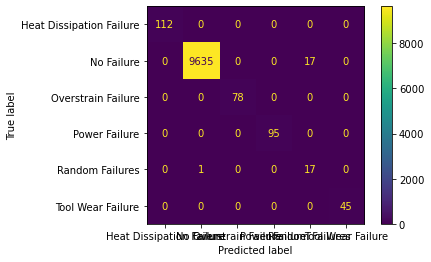

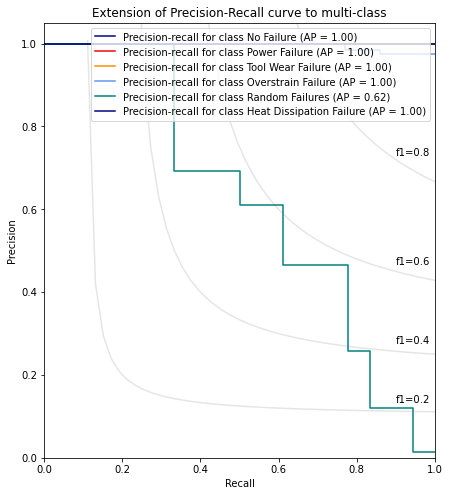

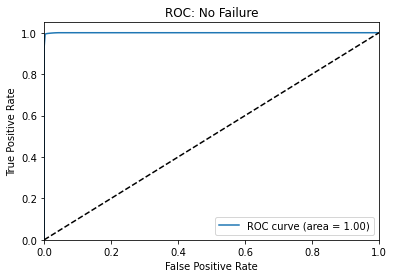

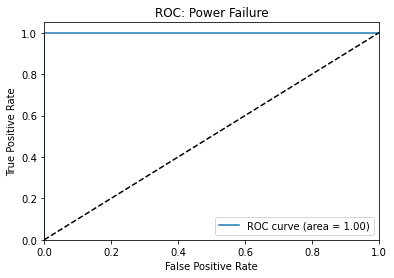

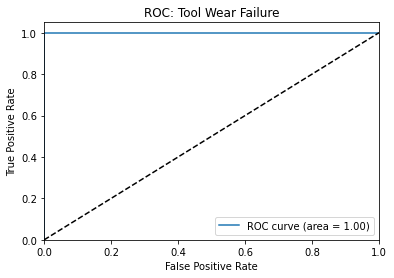

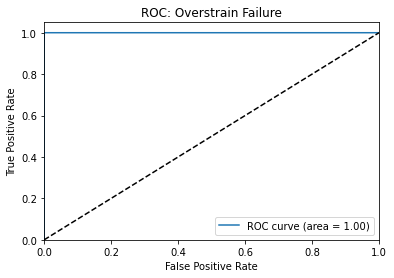

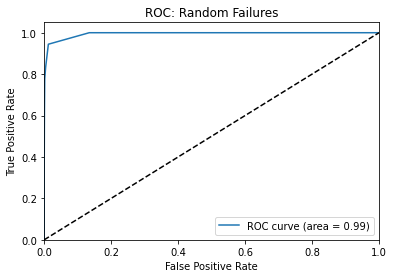

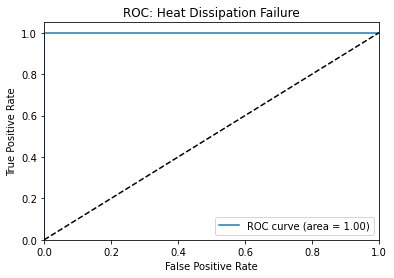

In [9]:
                        ###########################
                        ## Variable Failure_Type ##
                        ###########################
                        
X_failure_test= df.drop(["Type","Failure_Type"], axis=1) 
y_failure_test= df["Failure_Type"]
# Binarize the output
roturas=['No Failure', 'Power Failure', 'Tool Wear Failure','Overstrain Failure', 'Random Failures','Heat Dissipation Failure']
y = label_binarize(y_failure_test, classes=roturas)
n_classes = y.shape[1]
y_ros= label_binarize(y_ros_failure, classes=roturas)

# Creamos el modelo
tree_2 = DecisionTreeClassifier(max_depth=8, random_state = 42)
# UNO CONTRA EL RESTO
model_tree = OneVsRestClassifier(tree_2)
model_bin_tree= OneVsRestClassifier(tree_2)
# Entrenamos el algoritmo
model_tree.fit(X_ros_failure, y_ros_failure)
# Entrenamos algoritmos con datos binarios
model_bin_tree.fit(X_ros_failure, y_ros)
# score y datos binarios
y_score= model_bin_tree.predict_proba(X_failure_test)
# Prediccion en Train
y_train_pred = model_tree.predict(X_ros_failure)
# Prediccion en Test
y_test_pred = model_tree.predict(X_failure_test)

# Calculo el accuracy en Train
train_accuracy = accuracy_score(y_ros_failure, y_train_pred)
# Calculo el accuracy en Test
test_accuracy = accuracy_score(y_failure_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
# Matrix train
plot_confusion_matrix(model_tree, X_ros_failure, y_ros_failure)
# Matrix test
plot_confusion_matrix(model_tree, X_failure_test, y_failure_test)
plt.show()

# Recall con datos binarios
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y[:, i], y_score[:, i])
# setup plot details
colors = itertools.cycle(["navy", "red", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
     x = np.linspace(0.01, 1)
     h = f_score * x / (2 * x - f_score)
     (l) = plt.plot(x[h >= 0], h[h >= 0], color="gray", alpha=0.2)
     plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, h[45] + 0.02))

# display = PrecisionRecallDisplay(
#     recall=recall["micro"],
#     precision=precision["micro"],
#     average_precision=average_precision["micro"],
# )
# display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {roturas[i]}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")
plt.show()
# F1

#ROC y AUC
fpr= dict()
tpr= dict()
roc_auc= dict()
i=0
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(y[:,i], y_score[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
# Graficamos ROC
# Plot of a ROC curve for a specific class
for i,rotura in zip(range(n_classes),roturas):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC: {}".format(rotura))
    plt.legend(loc="lower right")
    plt.show()

# RANDOM FOREST

## Variable Target

                                        #####################################
                                        ## Implementacion de Random Forest ##
                                        #####################################

% de aciertos sobre el set de evaluación: 1.0
TEST Auc para nuestro modelo es 1.0
Recall Score del classificador Train: 1.0
F1 Score del classificador Train: 1.0


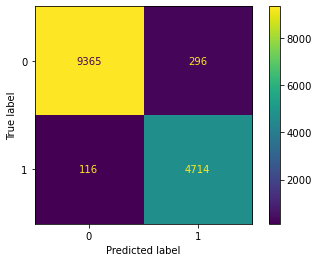

% de aciertos sobre el set de evaluación: 1.0
TRAIN Auc para nuestro modelo es 1.0
Recall Score del classificador Train: 1.0
F1 Score del classificador Train: 1.0


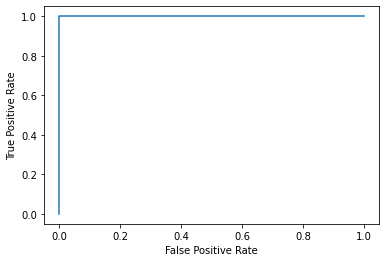

In [ ]:
# Creamos un random forest!
model_forest = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model_forest.fit(X_ros_Target, y_ros_Target)
# Prediccion en Train(OVERSAMPLING)
y_train_pred = model_forest.predict(X_ros_Target)
train_accuracy = accuracy_score(y_ros_Target, y_train_pred)
print('% de aciertos sobre el set de evaluación:',train_accuracy)
# TRAIN AUC Train
auc= roc_auc_score(y_ros_Target, y_train_pred)
print("TEST Auc para nuestro modelo es {}". format(auc))
# Recall Train
print(f"Recall Score del classificador Train: {recall_score(y_ros_Target, y_train_pred)}")
# F1 Score Train
print(f"F1 Score del classificador Train: {f1_score(y_ros_Target, y_train_pred)}")
# Ploteamos la Matriz train
plot_confusion_matrix(tree, X_ros_Target, y_ros_Target)
plt.show()

#Prediccion en Test (ORIGINAL)
y_test_pred = model_forest.predict(X_target_test) 
test_accuracy = accuracy_score(y_target_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
# TEST AUC Test
auc_2= roc_auc_score(y_target_test, y_test_pred)
print("TRAIN Auc para nuestro modelo es {}". format(auc))
# Recall Train
print(f"Recall Score del classificador Train: {recall_score(y_target_test, y_test_pred)}")
# F1 Score Train
print(f"F1 Score del classificador Train: {f1_score(y_target_test, y_test_pred)}")

# Graficamos ROC
y_pred_proba= model_forest.predict_proba(X_target_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_target_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Variable Failure_Type

% de aciertos sobre el set de evaluación: 0.998020748020748
% de aciertos sobre el set de evaluación: 0.9971


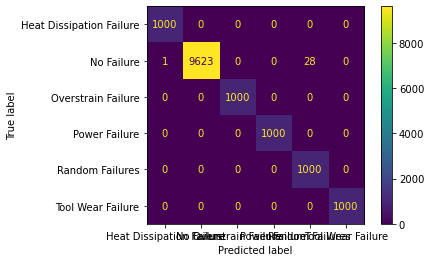

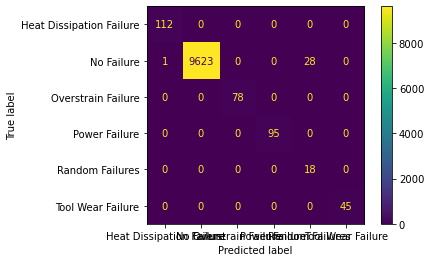

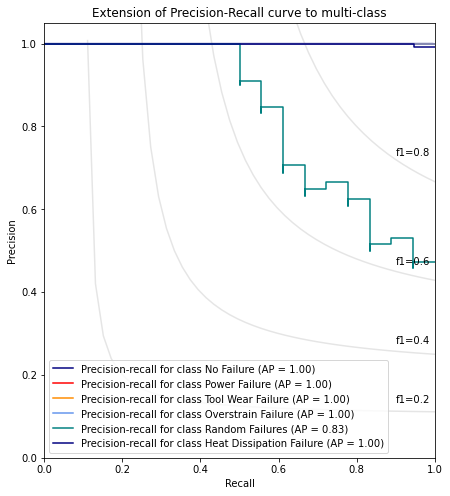

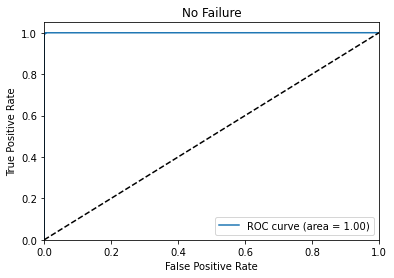

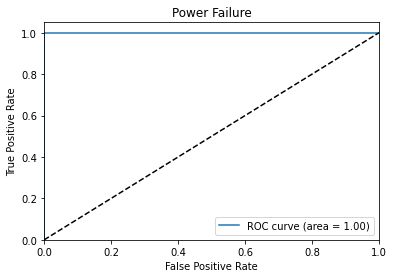

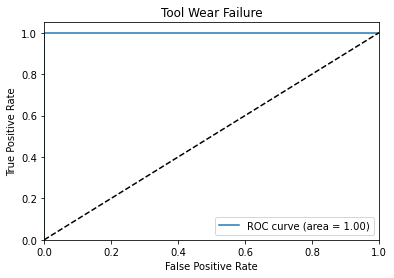

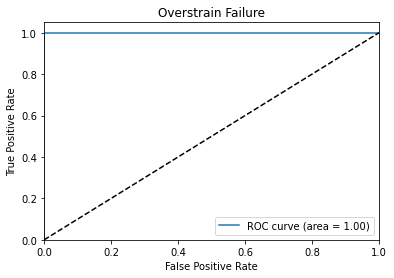

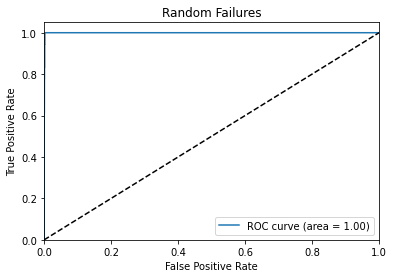

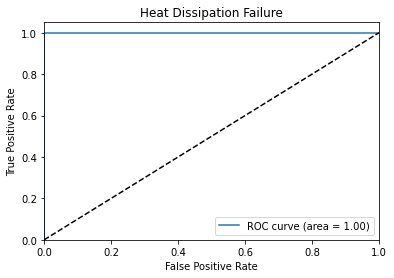

In [18]:
# Variable Failure_Type
# Creamos un random forest!

rf= RandomForestClassifier(random_state=11,
                               n_estimators=200,
                               class_weight="balanced", 
                               max_features="log2",
                               max_depth=8)
# Binarize the output
roturas=['No Failure', 'Power Failure', 'Tool Wear Failure','Overstrain Failure', 'Random Failures','Heat Dissipation Failure']
y = label_binarize(y_failure_test, classes=roturas)
n_classes = y.shape[1]
y_ros= label_binarize(y_ros_failure, classes=roturas)
# UNO VS EL RESTO
model_rf= OneVsRestClassifier(rf)
model_rf.fit(X_ros_failure, y_ros_failure)
# Modelo binarizado
model_bin_rf= OneVsRestClassifier(rf)
model_bin_rf.fit(X_ros_failure, y_ros)
y_score= model_bin_rf.predict_proba(X_failure_test)
# Prediccion en Train
y_train_pred= model_rf.predict(X_ros_failure) 
train_accuracy= accuracy_score(y_ros_failure, y_train_pred)
print('% de aciertos sobre el set de evaluación:',train_accuracy)

# Prediccion en Test
y_test_pred = model_rf.predict(X_failure_test) 
test_accuracy = accuracy_score(y_failure_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

# Matrix train
plot_confusion_matrix(model_rf, X_ros_failure, y_ros_failure)
# Matrix test
plot_confusion_matrix(model_rf, X_failure_test, y_failure_test)
plt.show()
# Recall con datos binarios
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y[:, i], y_score[:, i])
# setup plot details
colors = itertools.cycle(["navy", "red", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
     x = np.linspace(0.01, 1)
     h = f_score * x / (2 * x - f_score)
     (l) = plt.plot(x[h >= 0], h[h >= 0], color="gray", alpha=0.2)
     plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, h[45] + 0.02))

# display = PrecisionRecallDisplay(
#     recall=recall["micro"],
#     precision=precision["micro"],
#     average_precision=average_precision["micro"],
# )
# display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {roturas[i]}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")
plt.show()
#ROC y AUC
fpr= dict()
tpr= dict()
roc_auc= dict()
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(y[:,i], y_score[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
# Graficamos ROC
# Plot of a ROC curve for a specific class
for i,rotura in zip(range(n_classes),roturas):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(rotura)
    plt.legend(loc="lower right")
    plt.show()